# van der Pol Oscillator Quantum Limit

## Numerical Results of System Evolution

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip
import VdP

Constants for the quantum limit:

In [44]:
nbar_omega = nbar_delta = 0
gamma2 = 10

Constants:

In [45]:
VdP.N = 20                  # num. of levels
kappa  = 1
gamma1 = [0, 0.5, 1, 2, 3]

### First try: with Monte Carlo approximation

Solve the master equation:

In [56]:
gamma2 = 100
rho0 = qutip.fock(VdP.N)
rho_arr_mc = []
tlist = np.linspace(0.0, 20.0, VdP.tN)
for g1 in gamma1:
    rho_arr_mc.append(VdP.solve_lindblad(g1, gamma2, nbar_omega, nbar_delta, kappa, rho0, tlist, is_mc=True, opts=None))

10.0%. Run time:   2.21s. Est. time left: 00:00:00:19
20.0%. Run time:   4.24s. Est. time left: 00:00:00:16
30.0%. Run time:   6.37s. Est. time left: 00:00:00:14
40.0%. Run time:   8.60s. Est. time left: 00:00:00:12
50.0%. Run time:  11.48s. Est. time left: 00:00:00:11
60.0%. Run time:  14.89s. Est. time left: 00:00:00:09
70.0%. Run time:  17.31s. Est. time left: 00:00:00:07
80.0%. Run time:  19.37s. Est. time left: 00:00:00:04
90.0%. Run time:  21.51s. Est. time left: 00:00:00:02
100.0%. Run time:  23.66s. Est. time left: 00:00:00:00
Total run time:  23.74s
10.0%. Run time:   2.32s. Est. time left: 00:00:00:20
20.0%. Run time:   5.15s. Est. time left: 00:00:00:20
30.0%. Run time:   7.22s. Est. time left: 00:00:00:16
40.0%. Run time:   9.20s. Est. time left: 00:00:00:13
50.0%. Run time:  11.18s. Est. time left: 00:00:00:11
60.0%. Run time:  13.23s. Est. time left: 00:00:00:08
70.0%. Run time:  15.24s. Est. time left: 00:00:00:06
80.0%. Run time:  17.15s. Est. time left: 00:00:00:04
90.

`rho_mc[j]` is the average occupation probabilities of the system with $\gamma_1=$`gamma1[j]`

In [57]:
rho_mc = [[0 for i in range(VdP.N)] for j in range(len(gamma1))]

In [58]:
def get_level(ket):
    for i in range(ket.dims[0][0]):
        if ket[i][0][0] == 0: continue
        else: return i

In [59]:
for j, g1 in enumerate(gamma1):
    for i in range(len(rho_arr_mc[j].states)):
        rho_mc[j][get_level(rho_arr_mc[j].states[i][-1])] += 1

Compute the averages by normalizing:

In [60]:
rho_mc = [[i/sum(rho_mc[j]) for i in rho_mc[j]] for j in range(len(gamma1))]

### Second try: with mesolve(), i.e. numerical integration

Solve the master equation:

In [61]:
gamma2 = 10
rho0 = qutip.fock(VdP.N)
rho_arr_me = []
tlist = np.linspace(0.0, 20.0, VdP.tN)
opts = qutip.solver.Options(nsteps=10000)
for g1 in gamma1:
    rho_arr_me.append(VdP.solve_lindblad(g1, gamma2, nbar_omega, nbar_delta, kappa, rho0, tlist, opts=opts))

### Plot results and compare with analytical solution

Plot the occupation probability of $\rho_{0,0}$ as function of $\epsilon\equiv\frac{\gamma_1}{\kappa}$: #TODO

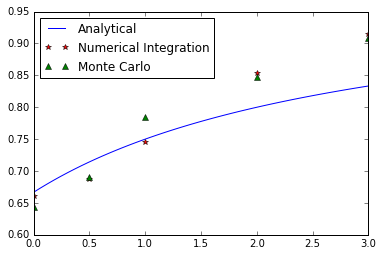

In [62]:
epsilon1 = [g1/kappa for g1 in gamma1]
epsilon2 = np.linspace(min(gamma1)/kappa,max(gamma1)/kappa)
# ground state probability of mesolve() and mcsolve()
gs_me0 = [rho_arr_me[j].states[-1].diag()[0] for j in range(len(gamma1))]
gs_mc0 = [rho_mc[j][0] for j in range(len(gamma1))]
# plot
plt.plot(epsilon2, (2+epsilon2)/(3+epsilon2), '-b', epsilon1, gs_me0, 'r*', epsilon1, gs_mc0, 'g^')
plt.legend(["Analytical","Numerical Integration","Monte Carlo"],loc="best")
plt.show()

Plot the occupation probability of $\rho_{1,1}$ as function of $\epsilon\equiv\frac{\gamma_1}{\kappa}$:

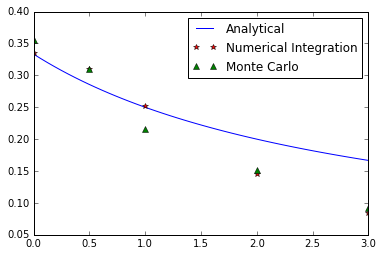

In [63]:
epsilon1 = [g1/kappa for g1 in gamma1]
epsilon2 = np.linspace(min(gamma1)/kappa,max(gamma1)/kappa)
# ground state probability of mesolve() and mcsolve()
gs_me1 = [rho_arr_me[j].states[-1].diag()[1] for j in range(len(gamma1))]
gs_mc1 = [rho_mc[j][1] for j in range(len(gamma1))]
# plot
plt.plot(epsilon2, 1/(3+epsilon2), '-b', epsilon1, gs_me1, 'r*', epsilon1, gs_mc1, 'g^')
plt.legend(["Analytical","Numerical Integration","Monte Carlo"],loc="best")
plt.show()

Compute Wigner function of solutions:

In [64]:
W = []
xvec = np.linspace(-7,7,200)
for j in range(len(gamma1)):
    W.append(qutip.wigner(rho_arr_me[j].states[-1], xvec, xvec))

Plot all Wigner functions:

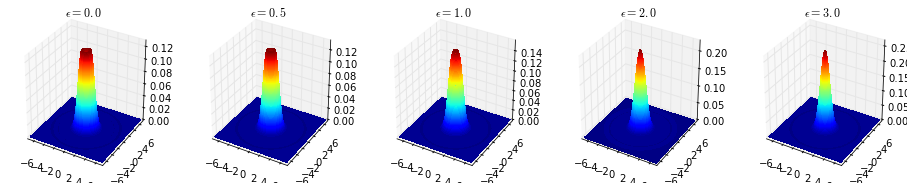

In [65]:
fig3, axes3 = plt.subplots(1, len(gamma1), figsize=(16,3), subplot_kw={'projection':'3d'})
for j in range(len(gamma1)):
    cont = axes3[j].contourf(xvec, xvec, W[j], 100)
    lbl = axes3[j].set_title('$\epsilon=%.1f$' % epsilon1[j])
plt.show()